***
<font size=+2>ID: **AI-0009**</font><br>
<font size=+2>Submission Date: **16-01-2018**</font>
***

## Abstract:
<font size=+0.5>**"Plant Seedlings Classification"**</font><br>
The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark released a Dataset containing Images of Plants belonging to 12 Species at several Growth Stages. This Project was based on this Dataset. Transfer Learning with several Layer Freezing was attempted and some of the Layers were kept as Trainable. For, Image Processing, Green Channel Conversion with OpenCV and Data Augmentation was attempted. Finally, the Pipelining of Base Model with Custom Layers shaped the Final Model. The approach is advanced CNN with Fine Tuned Pretrained Models like VGG19, VGG16, Xception and InceptionResnetV2. 

## Purpose of the Assignment:
The purpose of the Assignment is to dig into Computer Vision including Convolution Neural Network(CNN) and Transfer Learning to explore the Classification Methods. The Goal in this Assignment is to Determine the Species of a Seedling from an Image.
***

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) 
{
    return false;
} 
// This code snippet is used to turn off auto scrolling in outputs
// Ignore this snippet as it is not a part of the project

<IPython.core.display.Javascript object>

## 1. Data Set Overview


Total Number of Classes: 12
Total Data in the Train Set: 4750


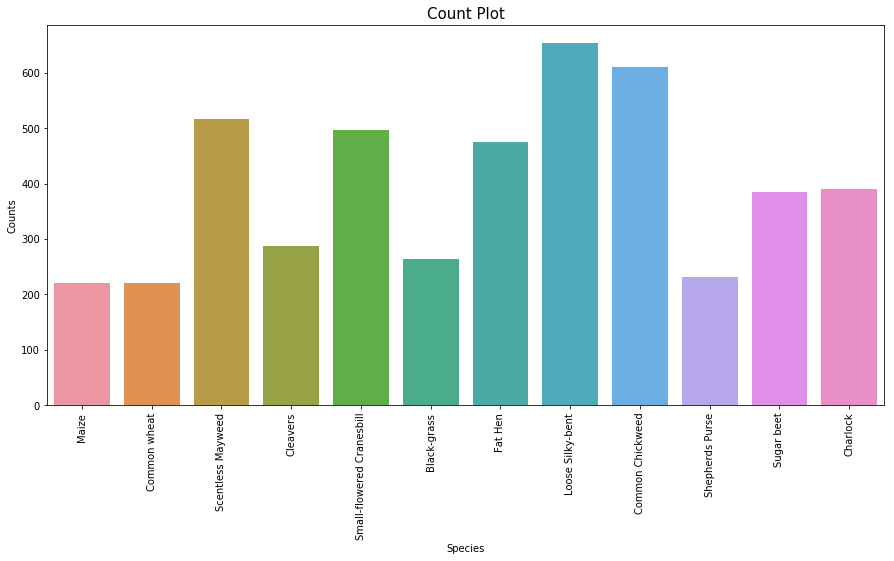

In [2]:
# Plant Seedlings Classification

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as Img
import seaborn as sb
import os
import cv2

# Data Overview by os Module
dirnametrn = '/mydata/train/'     # The Directory that contains all the Train Image Folders
folders = os.listdir(dirnametrn)  # List of Folder Names containing the Images
Labels = folders[:]  # List by Value
NC = len(folders)  # Number of Classes
print('\nTotal Number of Classes:', NC)

Counts = []
for folder in folders:
    imgdir = os.path.join(dirnametrn, folder)  # Image Folder Path
    Counts += [len(os.listdir(imgdir))]
print('Total Data in the Train Set:', sum(Counts))
    
# Data Frame and Plot
df = pd.DataFrame({'Species':Labels, 'Counts':Counts})
df = df[['Species', 'Counts']]
plt.figure(1, figsize=(15, 7))
plt.title('Count Plot', fontsize=15)
plt.xticks(rotation = 90)
sb.set(font_scale = 1.5)
sb.barplot(x = df['Species'], y = df['Counts'])
plt.show()

<h2>Cell Report:</h2><br>
**1.** Image Counts of Each Species were Visually represented.

## 2. Data Preprocessing

In [3]:
# # Green Channel Conversion(OpenCV)

# def create_mask_for_plant(image):
#     image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

#     sensitivity = 35
#     lower_hsv = np.array([60 - sensitivity, 100, 50])               
#     upper_hsv = np.array([60 + sensitivity, 255, 255])                  # Image Masking

#     mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
#     kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
#     mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
#     return mask

# def segment_plant(image):
#     mask = create_mask_for_plant(image)
#     output = cv2.bitwise_and(image, image, mask = mask)                 # Image Segmentation
#     return output

# def sharpen_image(image):
#     image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
#     image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)   # Image Sharpening
#     return image_sharp

# Pre Processing
from keras.preprocessing.image import ImageDataGenerator

ImSize = 256

# One Hot Encoding of Labels
LabelSeries = []
for i in range(NC):
    for j in range(Counts[i]):
        LabelSeries += [Labels[i]]
OHE = pd.get_dummies(LabelSeries, sparse = True)
PStrnOHE = np.asarray(OHE)

# Data Import(Train Set)
PStrnX = []   # Train Images
PStrnRY = []  # Train Image Labels
i = 0
for folder in folders:
    imgdir = os.path.join(dirnametrn, folder)  # Image Folder Path
    images = os.listdir(imgdir)
    for ImageId in images:
        xdir = os.path.join(imgdir, ImageId)
        x = cv2.imread(xdir)
        Label = PStrnOHE[i]
#       x = segment_plant(x)
#       x = sharpen_image(x)
        PStrnX.append(cv2.resize(x, (ImSize, ImSize)))
        PStrnRY.append(Label)
        i = i + 1

# Data Import(Test Set)
PStstY = pd.read_csv('/mydata/sample_submission.csv')  # Test file and species
dirnametst = '/mydata/test/'
PStstX = []  # Test Images
for ImageId in PStstY['file'].values:
    xdir = os.path.join(dirnametst, ImageId)
    x = cv2.imread(xdir)
    PStstX.append(cv2.resize(x, (ImSize, ImSize)))

# Data Normalization(Min-Max)
PStrnRY = np.array(PStrnRY, np.uint8)
PStrnRX = np.array(PStrnX, np.float32) / 255.0
PStstRX = np.array(PStstX, np.float32) / 255.0

# Data Shape
print('\nShape of Train Data:', PStrnRX.shape)
print('Shape of Train Labels:', PStrnRY.shape)
print('Shape of Test Data:', PStstRX.shape)

# Data Augmentation
DataGen = ImageDataGenerator(featurewise_center = False,  # Set Input Mean to 0 over the Dataset
                             samplewise_center = False,   # Set each Sample Mean to 0
                             featurewise_std_normalization = False,  # Divide Inputs by STD of the Dataset
                             samplewise_std_normalization = False,   # Divide each Input by its STD
                             zca_whitening = False,     # ZCA whitening
                             rotation_range = 30,       # Randomly rotate Images
                             zoom_range = 0.3,          # Randomly zoom Images 
                             width_shift_range = 0.3,   # Randomly shift Images horizontally (fraction of total width)
                             height_shift_range = 0.3,  # Randomly shift images vertically (fraction of total height)
                             fill_mode = 'nearest')      # Padding Type
                             #horizontal_flip = True,    # Randomly flip Images(Horizontal)
                             #vertical_flip = False)     # Randomly flip Images(Vertical)

Using TensorFlow backend.



Shape of Train Data: (4750, 256, 256, 3)
Shape of Train Labels: (4750, 12)
Shape of Test Data: (794, 256, 256, 3)


<h2>Cell Report:</h2><br>
**1.** Labels were One Hot Encoded as required by Keras and also the Scoring will be in Multiclass Loss.<br>
**2.** Train and Test Images were imported sequentially and resized.<br>
**3.** Data were Normalized(Min-Max).<br>
**4.** Data Shapes were represented.<br>
**5.** Image Size: 256 X 256<br>
**6.** It is to be noted that Green Channel Conversion by OpenCV seemed to be a lucrative Pre Processing Step but as it wasn't much of a help, rather aggravative, it was omitted.<br>
**7.** Data Augmentation was applied.

## 3. Decision of Algorithm and Model

In [ ]:
# Keras(Transfer Learning)
from sklearn import preprocessing

import keras

from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Dropout 
from keras.layers import Flatten
from keras.models import Model
from keras.layers import GlobalAveragePooling2D
from keras.applications.vgg19 import VGG19
from keras import backend as k 
from keras.callbacks import EarlyStopping

# Base Pre Trained Model
BaseModel = VGG19(weights = 'imagenet', 
                  include_top = False, 
                  input_shape = (ImSize, ImSize, 3))
# Layer Freezing
for layer in BaseModel.layers[:7]:
    layer.trainable = False

# New Top Layer
x = BaseModel.output
x = Flatten()(x)
x = Dense(1024, activation = 'relu')(x)
#x = BatchNormalization()(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation = 'relu')(x)
#x = BatchNormalization()(x)
x = Dropout(0.25)(x)

# Prediction Layer(Last Dense Layer)
PredLayer = Dense(NC, activation = 'softmax')(x)  # NC = Number of Classes

# Model Pipelining
model = Model(inputs = BaseModel.input, outputs = PredLayer)

<h2>Cell Report:</h2><br>
**1.** Transfer Learning was utilized for the Model. The Model Summary is given below.<br>
**2.** Various Pre Trained Model from Keras was used and the best was found to be VGG19.<br>
**3.** Weights were taken from 'imagenet' and used in the BaseModel.<br>
**4.** Output of the BaseModel was Flattened and Pipelined through 2 Dense Layers with Dropout to the Prediction Layer.<br>
**5.** Batch Normalization didn't work out.<br>
**6.** For the Base Model, first 7 Layers were Freezed(Trainable = False).<br>
**7.** Various Layer Freezing approaches were attempted(5 Layers Freezed, 7 Layers Freezed, 9 Layers Freezed).<br>
**8.** VGG19, Xception, VGG16 were also attempted with all Layers Freezed. But VGG19 with 7 Layers Freezed worked best.

## 4. Decision of Hyper Parameters:
<font size=+1.5>(Epochs, Activation Function, Optimizer, Learning Rate and Number of Neurons)</font>

In [5]:
# Hyper Parameter Tuning
from keras.optimizers import SGD
from keras.callbacks import ReduceLROnPlateau

# Epochs
epochs = 15  # More Epochs must have improved the Final Score but it is beyond the capability of Cloud's 2 hours capability
batch_size = 25

# Activation Function
# The Activation Fun in the Prediction Layer is 'softmax' as it should be

# Optimizer
optimizer = SGD(lr = 0.0001, momentum = 0.9)

# Learning Rate
LRA = ReduceLROnPlateau(monitor = 'val_acc',  # Learning Rate Annealer   
                        patience = 5, 
                        verbose = 1, 
                        factor = 0.5, 
                        min_lr = 0.00001)

# Number of Neurons
# 2 Dense Layers(1024, 1024)
# Number of Neurons in the Prediction Layer is 120(Number of Classes)

<h2>Cell Report:</h2><br>
**1.** Hyper Parameters were tuned.<br>
**2.** SGD was used as Optimizer as it works well in this Architecture.<br>
**3.** In order to make the Optimizer converge faster and closest to the Global Minimum of the Loss Function, an Annealing Method of the Learning Rate(LR) was used because it's better to have a decreasing Learning Rate during the Training to reach efficiently the Global Minimum of the Loss Function.<br>
**4.** With the ReduceLROnPlateau function from Keras.callbacks, it was chosen to reduce the LR by half if the Accuracy is not improved after 5 epochs.<br>
**5.** More epochs could have improved the Final Score but due to limitations of Available Computational Power, it was not affordable.<br>
**6.** Activation Function in the Last Layer: 'softmax'.

## 5. Best Designed Model(Tuned Hyper Parameters)

In [6]:
# Model(Final)
model.compile(loss = 'categorical_crossentropy', 
              optimizer = optimizer, 
              metrics = ['accuracy'])

#callbacks_list = [keras.callbacks.EarlyStopping(monitor = 'val_acc', patience = 5, verbose = 2)]
print('\nModel Summary:\n')
model.summary()

# Training of Model
model.fit_generator(DataGen.flow(PStrnRX, PStrnRY, batch_size = batch_size),
                                 epochs = epochs, 
                                 verbose = 2, 
                                 steps_per_epoch = PStrnRX.shape[0] // batch_size)
                                 #callbacks = [LRA])

# Predictions
PredPS = model.predict(PStstRX, verbose = 1)

# DataFrame
PredPS = pd.DataFrame(PredPS)

# Column Names
ColNames = OHE.columns.values
PredPS.columns = ColNames

# Class Conversion
PredPS['species'] = PredPS.idxmax(axis = 1)
PredPS = PredPS['species']
PredPS = pd.DataFrame({'species':PredPS})

# Column Id
PredPS.insert(0, 'file', PStstY['file'])

# CSV File(Kaggle Format)
PredPS.to_csv('PredPS(MFinal).csv', index=False)


Model Summary:

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0   

<h2>Cell Report:</h2><br>
**1.** Best Designed Model with Tuned Hyper Parameters was represented.<br>
**2.** Kaggle Score: 0.91561(F-Mean Score)

## 6. Results
**1.** Final Kaggle Score(Best Designed Model): 0.91561<br>
**2.** The Submission File(Predicted Outputs) has been attached.<br> 
**3.** A Sample Output has been shown below.

### 6.1 Sample Output

In [4]:
# Sample Output
PredPS = pd.read_csv('PredPS(MFinal).csv')
print('\nSample Output(10 Predictions):\n')
print(PredPS.head(10))


Sample Output(5 Predictions):

            file                    species
0  0021e90e4.png  Small-flowered Cranesbill
1  003d61042.png                    Fat Hen
2  007b3da8b.png                    Fat Hen
3  0086a6340.png           Common Chickweed
4  00c47e980.png                 Sugar beet
5  00d090cde.png           Loose Silky-bent
6  00ef713a8.png           Common Chickweed
7  01291174f.png                    Fat Hen
8  026716f9b.png           Loose Silky-bent
9  02cfeb38d.png           Loose Silky-bent


### 6.2 Kaggle Score(Screen Shot)

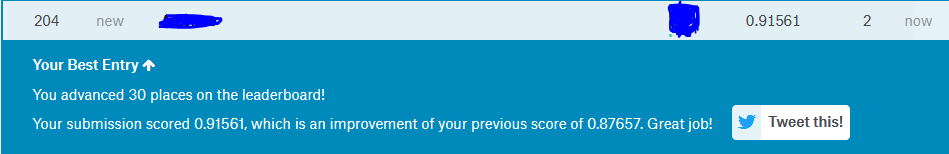

In [5]:
# Kaggle Score(Screen Shot)
from IPython.display import Image
Image('Kaggle.PNG')

<font size=+1.8>**Note: The main problem during the Project was a Good Personal Computer with powerful GPU(Nvidia) and sufficient RAM. My Laptop does not have Nvidia GPU and enough RAM to run this Project. So, I had to rely on Cloud Service(Floydhub.com) where I created multiple accounts to take 2 hours of free GPU service on each account. 2 hours time limit is never enough for this kind of Image Classification based Projects. So, I had to limit my Number of epochs and other important Parameters such as Number of Base Model Layers to keep as Trainable. It is also to be mentioned that it takes so much time to upload large Datsets of Image Classification and other Dependencies on Floydhub. Also each account creation on Floydhub.com requires time which is exhaustive. With such time consuming miscellaneous activities and with such Resource Constraints, it is impossible to achieve good scores on Kaggle. So, the evaluation should be based on the Approach rather than Scores. Only if I could run the project without this limitations, Kaggle Score would have been appreciable.**</font>

## 7. Discussion
**1.** More epochs must have improved the Final Score.<br>
**2.** Data Augmentation helped improving the Final Score.<br>
**3.** Imbalanced Learning would have improved the Final Score.

## 8. Conclusions

**Ensembling Model:** Using Ensembling Model for this kind of Projects is a very good idea but regarding the Computational Power available, it was not possible. The idea will be considered for Future Improvements.